# Eyesense 

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array


## DataFrame Analysis

In [2]:
df = pd.read_csv("/Users/erika/code/caazzi/eyesense/raw_data/ocular-disease-recognition-odir5k/full_df.csv")

### General information about the data

In [3]:
df.describe()

,ID,Patient Age,N,D,G,C,A,H,M,O
count,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000
mean,2271.150814,57.857947,0.328692,0.332134,0.062109,0.062891,0.049906,0.031758,0.047872,0.248436
std,1417.559018,11.727737,0.469775,0.471016,0.241372,0.242786,0.217768,0.175370,0.213513,0.432139
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,920.750000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2419.500000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3294.000000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4784.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<br>The dataset has **6392** entries of pictures and diagnosis and **4784** indicating that not all patients have pictures for both eyes.</br>
<br>The ages vary between 1 and 91 years old.</br>
<br>Annotations were labeled by trained human readers with quality control management. They classify patients into eight labels, including:</br>

- Normal (N),
- Diabetes (D),
- Glaucoma (G),
- Cataract (C),
- Age related Macular Degeneration (A),
- Hypertension (H),
- Pathological Myopia (M),
- Other diseases/abnormalities (O)

In [4]:
df.sort_values("ID").head(10)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
3194,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['C'],"[0, 0, 0, 1, 0, 0, 0, 0]",0_left.jpg
3195,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_left.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3196,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",3_left.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
3197,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['O'],"[0, 0, 0, 0, 0, 0, 0, 1]",4_left.jpg
3198,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_left.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Patient Sex                6392 non-null   object
 3   Left-Fundus                6392 non-null   object
 4   Right-Fundus               6392 non-null   object
 5   Left-Diagnostic Keywords   6392 non-null   object
 6   Right-Diagnostic Keywords  6392 non-null   object
 7   N                          6392 non-null   int64 
 8   D                          6392 non-null   int64 
 9   G                          6392 non-null   int64 
 10  C                          6392 non-null   int64 
 11  A                          6392 non-null   int64 
 12  H                          6392 non-null   int64 
 13  M                          6392 non-null   int64 
 14  O       

> There are no null values in the DataFrame.

### Data distribution plots

In [173]:
df["Patient Sex"].value_counts()

Patient Sex
Male      3424
Female    2968
Name: count, dtype: int64

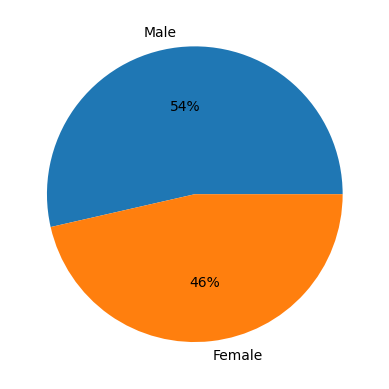

In [174]:
plt.pie(df["Patient Sex"].value_counts(), labels=['Male', 'Female'] ,autopct='%.0f%%')
plt.show()

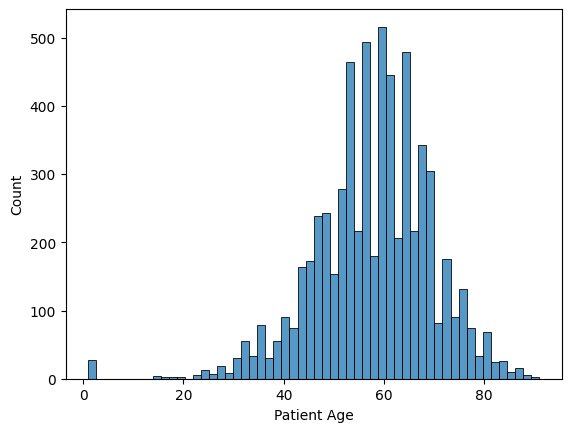

In [7]:
sns.histplot(df["Patient Age"]);

In [172]:
df['labels'].value_counts()

labels
['N']    2873
['D']    1608
['O']     708
['C']     293
['G']     284
['A']     266
['M']     232
['H']     128
Name: count, dtype: int64

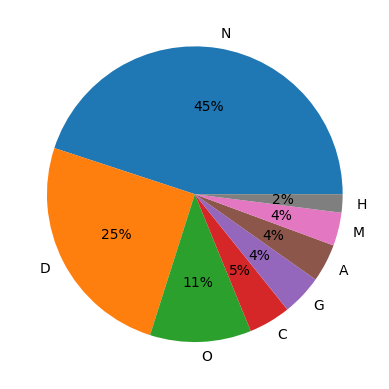

In [171]:
plt.pie(df['labels'].value_counts(), labels=['N', 'D', 'O', 'C', 'G', 'A', 'M', 'H'] ,autopct='%.0f%%')
plt.show()

> The major class is "Normal", thus if our model classifies all the images as "N", our baseline accuracy will be 45%

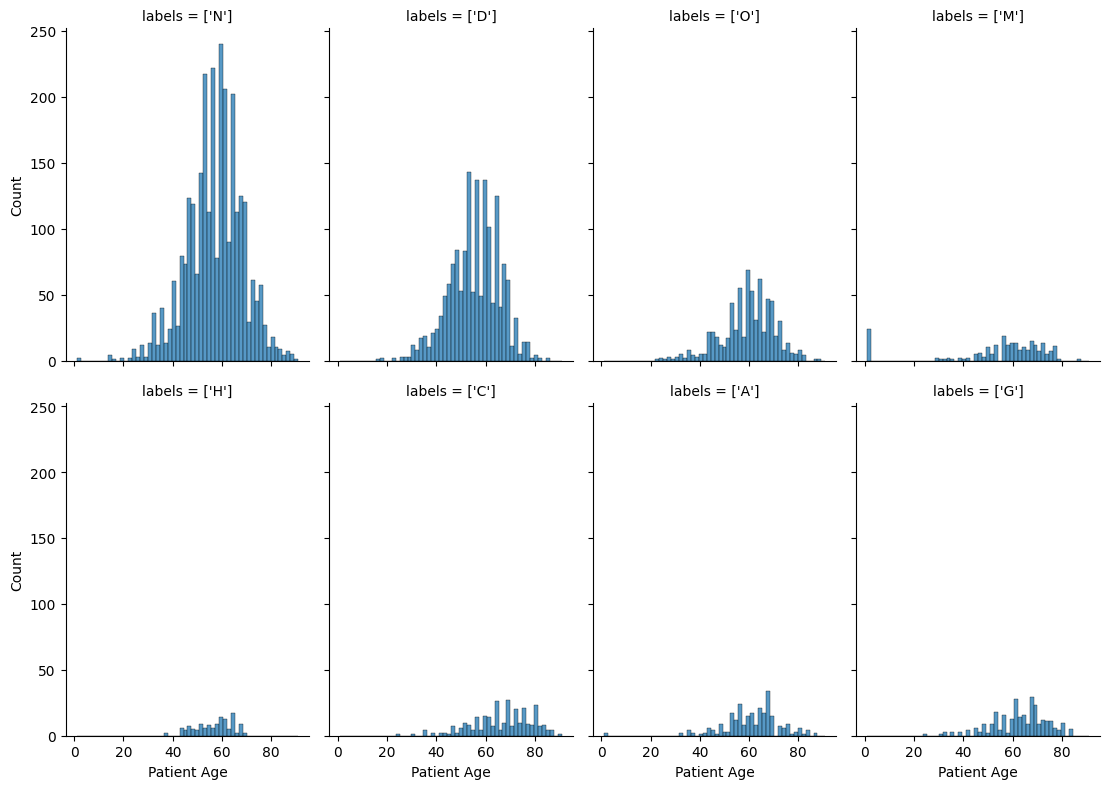

In [9]:
sns.displot(df, x="Patient Age", col="labels", height=4, aspect=.7, col_wrap=4)

In [10]:
df[df['Patient Age'] <= 15].groupby("Patient Age")["labels"].value_counts()

Patient Age  labels
1            ['M']     24
             ['A']      2
             ['N']      2
14           ['N']      2
15           ['N']      2
Name: count, dtype: int64

> The most common diseases in patients with age smaller than 15 is Pathological Myopia (M).

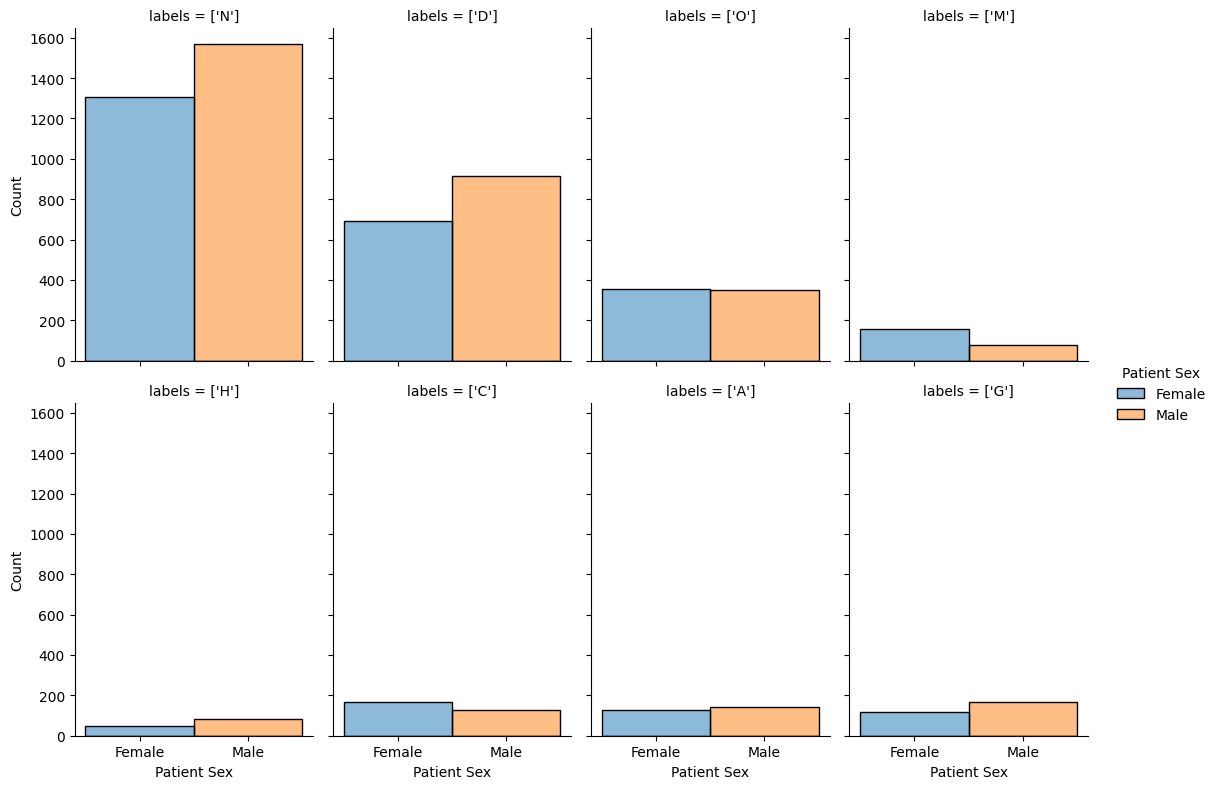

In [11]:
sns.displot(df, x="Patient Sex", col="labels", hue="Patient Sex", height=4, aspect=.7, col_wrap=4)

<Axes: >

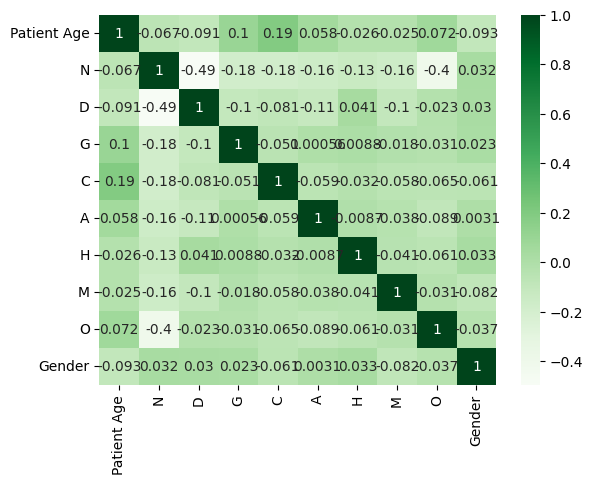

In [12]:
from sklearn.preprocessing import LabelEncoder

df["Gender"] = LabelEncoder().fit_transform(df["Patient Sex"])

matrix = df.select_dtypes(include=[np.number]).drop(columns='ID').corr()
sns.heatmap(matrix, cmap="Greens", annot=True)

In [13]:
df=df.drop(columns='Gender')

> The biggest correlations found were between the patient's age and Cataract, Glaucoma.

## Images analysis

### Load the images form the different folders given in a list of images

In [14]:
path_train = "/Users/erika/code/caazzi/eyesense/raw_data/ocular-disease-recognition-odir5k/ODIR-5K/ODIR-5K/Training Images"
path_test = "/Users/erika/code/caazzi/eyesense/raw_data/ocular-disease-recognition-odir5k/ODIR-5K/ODIR-5K/Testing Images"
path_preproc = "/Users/erika/code/caazzi/eyesense/raw_data/ocular-disease-recognition-odir5k/preprocessed_images"

img_list_train = os.listdir(path_train)
img_list_test = os.listdir(path_test)
img_list_preproc = os.listdir(path_preproc)

#img_dict = {img.strip(".jpg"): image.load_img(os.path.join(path, img)) for img in img_list}


In [15]:
#img_train = [image.load_img(os.path.join(path_train, img)) for img in img_list_train]
#img_test = [image.load_img(os.path.join(path_test, img)) for img in img_list_test]
#img_preproc = [image.load_img(os.path.join(path_preproc, img)) for img in img_list_preproc]

In [16]:
#plt.imshow(img_preproc[10])

In [17]:
#tmp = 0
#for i in range(len(img_train)):
#    tmp = tmp + img_train[i].size[0]
#avg_size_lines = tmp/len(img_train)

In [18]:
#avg_size_lines

In [19]:
#tmp = 0
#for i in range(len(img_train)):
#    tmp = tmp + img_train[i].size[1]
#avg_size_col = tmp/len(img_train)

In [20]:
#avg_size_col

As imagens do conjunto de treinamento possuem tamanho médio de (2465, 1807)

In [21]:
#tmp = 0
#for i in range(len(img_test)):
#    tmp = tmp + img_test[i].size[0]
#avg_size_lines = tmp/len(img_test)

In [22]:
#avg_size_lines

In [23]:
#tmp = 0
#for i in range(len(img_train)):
#    tmp = tmp + img_train[i].size[1]
#avg_size_col = tmp/len(img_train)

In [24]:
#avg_size_col

As imagens do conjunto de teste possuem tamanho médio de (2520, 1807)

In [25]:
#tmp = 0
#for i in range(len(img_preproc)):
#    tmp = tmp + img_preproc[i].size[0]
#avg_size_lines = tmp/len(img_preproc)

In [26]:
#avg_size_lines

In [27]:
#tmp = 0
#for i in range(len(img_preproc)):
#    tmp = tmp + img_preproc[i].size[1]
#avg_size_col = tmp/len(img_preproc)

In [28]:
#avg_size_col

As imagens do conjunto preprocessado possuem tamanho médio de (512, 512)

### Associate the images to the correspondent row in the DataFrame

In [29]:
image_size = (256, 256)
df['images'] = df['filename'].apply(lambda x: image.load_img(os.path.join(path_preproc, x), target_size=image_size))

In [30]:
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename,images
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,<PIL.Image.Image image mode=RGB size=256x256 a...
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,<PIL.Image.Image image mode=RGB size=256x256 a...
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,<PIL.Image.Image image mode=RGB size=256x256 a...
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg,<PIL.Image.Image image mode=RGB size=256x256 a...
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg,<PIL.Image.Image image mode=RGB size=256x256 a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg,<PIL.Image.Image image mode=RGB size=256x256 a...
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg,<PIL.Image.Image image mode=RGB size=256x256 a...
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg,<PIL.Image.Image image mode=RGB size=256x256 a...
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg,<PIL.Image.Image image mode=RGB size=256x256 a...


### Associate the tensors to the correspondent row in the DataFrame.

In [31]:
#df['tensor images'] = df['images'].apply(lambda x: tf.convert_to_tensor(img_to_array(x)))

In [32]:
#df

## PCA analysis

### Check-list for PCA

In [130]:
from PIL import Image
import os

sizes = set()
for img_name in os.listdir(path_preproc):
    img_path = os.path.join(path_preproc, img_name)
    with Image.open(img_path) as img:
        sizes.add(img.size)

# Exibir tamanhos únicos
print("Unique sizes found:", sizes)

Unique sizes found: {(512, 512)}


> All images have (size 512,512)

In [132]:
modes = set()
for img_name in os.listdir(path_preproc):
    img_path = os.path.join(path_preproc, img_name)
    with Image.open(img_path) as img:
        modes.add(img.mode)

print("Color modes found:", modes)

Color modes found: {'RGB'}


> All images are in RGB mode

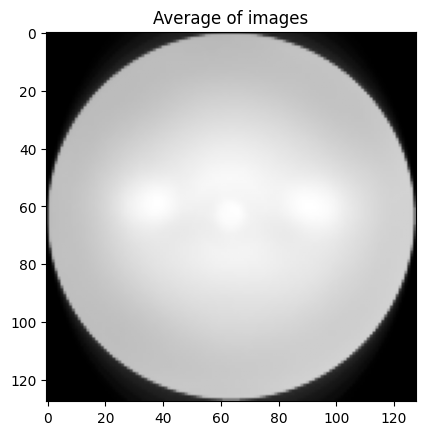

In [133]:
import cv2

imgs = []
for img_name in os.listdir(path_preproc):
    img_path = os.path.join(path_preproc, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Converter para grayscale
    img = cv2.resize(img, (128, 128))  # Redimensionar para um tamanho fixo
    imgs.append(img)

# Calcular média
mean_img = np.mean(imgs, axis=0)

# Exibir imagem média
plt.imshow(mean_img, cmap='gray')
plt.title("Average of images")
plt.show()

In [135]:
# Normalizar imagens
imgs_norm = [img / 255.0 for img in imgs]

# Verificar valores mínimo e máximo
print("Min:", np.min(imgs_norm), "Max:", np.max(imgs_norm))

Min: 0.0 Max: 1.0


> Normalized images range from 0 to 1.

### Image preprocessing and PCA

In [138]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array

def process_images(df, batch_size=500):
    """
    Converte imagens para arrays achatados em batches para reduzir uso de memória.
    Também normaliza os valores dos pixels entre 0 e 1.
    """
    num_images = len(df)
    batch_features = []

    for i in range(0, num_images, batch_size):
        batch = df['images'][i:i+batch_size]  # Seleciona um lote de imagens
        
        # Converte imagens para arrays NumPy
        batch_arrays = [img_to_array(img) for img in batch]
        
        # Normaliza os valores dos pixels (0 a 1)
        batch_normalized = [img / 255.0 for img in batch_arrays]

        # Achata as imagens
        batch_processed = [img.flatten() for img in batch_normalized]

        # Adiciona ao batch final
        batch_features.append(np.array(batch_processed, dtype=np.float16))

    return np.vstack(batch_features)  # Junta os batches em um único array grande

In [155]:
X = process_images(df, batch_size=150)
print(f"X format: {X.shape}")

X format: (6392, 196608)


In [141]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50) 
X_pca = pca.fit_transform(X)

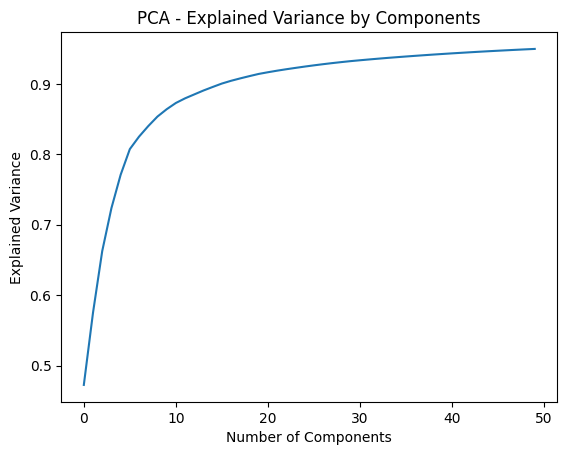

In [142]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.title("PCA - Explained Variance by Components")

plt.show()

In [143]:
pca.components_.shape

(50, 196608)

In [144]:
y = df['labels']

## Naive model with KNN

### Cross-validation and n-neighbors search

In [145]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

acc_n = {}
for n in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors=n)
    mean_acc = cross_val_score(knn, X=X_pca, y=y, scoring='accuracy', cv=5).mean()
    acc_n[n] = mean_acc

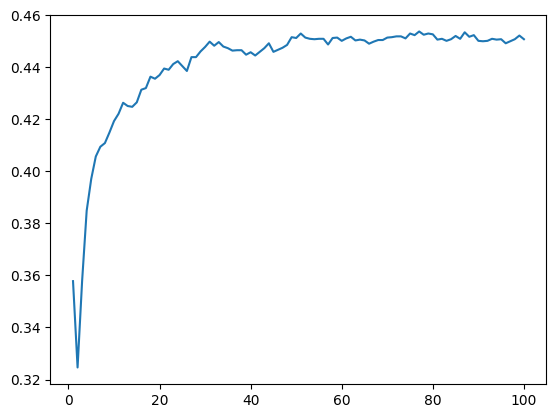

In [146]:
plt.plot(acc_n.keys(), acc_n.values())

In [147]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = KNeighborsClassifier(n_neighbors=35), X=X_pca, y=y, cv=5, scoring='accuracy')

In [148]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

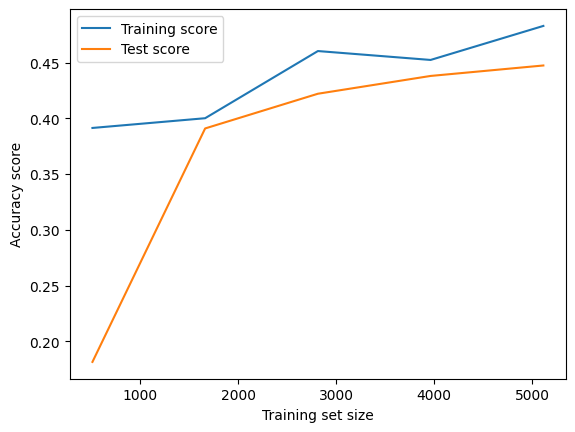

In [149]:
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Test score')
plt.xlabel('Training set size')
plt.ylabel('Accuracy score')
plt.legend()
plt.show()

> Number of neigbohrs that improve accuracy: **35**

### Hold-out validation

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [151]:
knn = KNeighborsClassifier(n_neighbors=35)  # Teste diferentes valores de K
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=35)

In [152]:
y_pred = knn.predict(X_test)

In [153]:
y_pred

array(["['N']", "['N']", "['N']", ..., "['N']", "['N']", "['N']"],
      dtype=object)

In [154]:
from sklearn.metrics import accuracy_score
print(f"Acurácia do KNN: {accuracy_score(y_test, y_pred):.3f}")

Acurácia do KNN: 0.454


### Metrics

In [159]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculando as métricas corretamente para classificação multiclasse
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # ou 'macro'
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Exibir os resultados
print(f"The model's accuracy is: {accuracy}")
print(f"The model's precision is: {precision}")
print(f"The model's recall is: {recall}")
print(f"The F1 score is: {f1}")

The model's accuracy is: 0.45426114151681
The model's precision is: 0.42105830286782775
The model's recall is: 0.45426114151681
The F1 score is: 0.36170490202584604


/Users/erika/.pyenv/versions/3.10.6/envs/eyesense/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


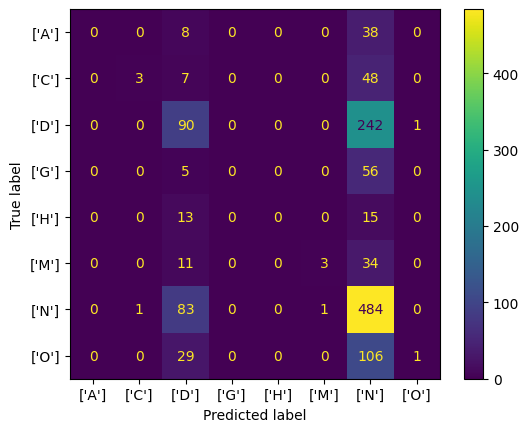

In [161]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

plt.show()

The model clearly predicts the images as being from the "N" class, which is the prevalent class.

## Naive model with Random Forest

### Cross-validation

In [164]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

RFClass = RandomForestClassifier()
mean_acc = cross_val_score(RFClass, X=X_pca, y=y, scoring='accuracy', cv=5).mean()
mean_acc

np.float64(0.4624546514601465)

### Hold-out method

In [165]:
RFClass.fit(X_train, y_train)

RandomForestClassifier()

In [166]:
y_pred = RFClass.predict(X_test)

### Confusion matrix

In [167]:
# Calculando as métricas corretamente para classificação multiclasse
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # ou 'macro'
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Exibir os resultados
print(f"The model's accuracy is: {accuracy}")
print(f"The model's precision is: {precision}")
print(f"The model's recall is: {recall}")
print(f"The F1 score is: {f1}")

The model's accuracy is: 0.4683346364347146
The model's precision is: 0.45599292827824256
The model's recall is: 0.4683346364347146
The F1 score is: 0.3677201294666116


/Users/erika/.pyenv/versions/3.10.6/envs/eyesense/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


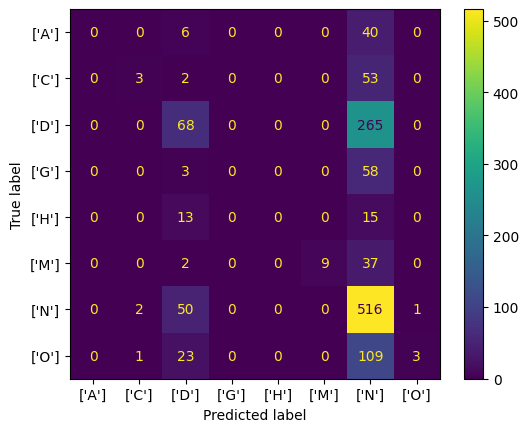

In [168]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

plt.show()

## Test with data augmentation

### Check-list for PCA

In [177]:
from PIL import Image
import os
import numpy as np

# Diretório principal onde as imagens estão organizadas em subpastas
path_train_aug = "data_train"

# Conjuntos para armazenar as verificações
sizes = set()  # Guarda tamanhos únicos das imagens
modes = set()  # Guarda modos de cor (RGB, L, RGBA, etc.)
num_images = 0  # Contador de imagens processadas

# Percorrer todas as subpastas e arquivos
for root, _, files in os.walk(path_train_aug):
    for img_name in files:
        img_path = os.path.join(root, img_name)

        try:
            with Image.open(img_path) as img:
                sizes.add(img.size)  # Adiciona tamanho da imagem
                modes.add(img.mode)  # Adiciona modo de cor (ex: 'RGB', 'L')
                num_images += 1
        except Exception as e:
            print(f"Erro ao abrir {img_path}: {e}")  # Exibir erro, mas continuar a execução

# Verificando se todas as imagens são compatíveis com PCA
if len(sizes) > 1:
    print(f"🚨 Erro: As imagens têm tamanhos diferentes: {sizes}")
    print("⚠️ Todas as imagens precisam ter o mesmo tamanho para PCA.")
else:
    print(f"✅ Todas as imagens têm o mesmo tamanho: {list(sizes)[0]}")

if len(modes) > 1:
    print(f"🚨 Erro: As imagens têm diferentes modos de cor: {modes}")
    print("⚠️ Convertendo todas para o mesmo formato pode ser necessário (ex: RGB).")
else:
    print(f"✅ Todas as imagens estão no mesmo modo de cor: {list(modes)[0]}")

if num_images < 2:
    print("🚨 Erro: Poucas imagens encontradas para PCA. É necessário mais amostras.")
else:
    print(f"✅ Número de imagens suficiente: {num_images}")

✅ Todas as imagens têm o mesmo tamanho: (512, 512)
✅ Todas as imagens estão no mesmo modo de cor: RGB
✅ Número de imagens suficiente: 14437


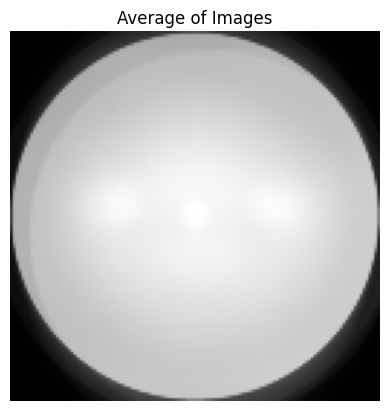

In [178]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

path_preproc = "data_train"  # Diretório com imagens organizadas em subpastas

imgs = []

# Percorrer todas as subpastas e arquivos
for root, _, files in os.walk(path_preproc):
    for img_name in files:
        img_path = os.path.join(root, img_name)
        
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Converter para grayscale
            if img is None:
                print(f"⚠️ Erro ao carregar imagem: {img_path}")
                continue  # Pular imagens corrompidas ou incompatíveis
            
            img = cv2.resize(img, (128, 128))  # Redimensionar para um tamanho fixo
            imgs.append(img)
        
        except Exception as e:
            print(f"⚠️ Erro ao processar {img_path}: {e}")

# Verificar se existem imagens antes de calcular a média
if len(imgs) == 0:
    print("🚨 Nenhuma imagem válida encontrada!")
else:
    # Calcular média das imagens
    mean_img = np.mean(imgs, axis=0)

    # Exibir imagem média
    plt.imshow(mean_img, cmap='gray')
    plt.title("Average of Images")
    plt.axis("off")
    plt.show()

### PCA

In [183]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

batch_size = 8

train_ds = image_dataset_from_directory(
  path_train_aug,
  validation_split=0.2,
  subset="training",
  seed=10,
  image_size=(256,256),
  batch_size=batch_size)

Found 14437 files belonging to 8 classes.
Using 11550 files for training.


In [188]:
import numpy as np
import tensorflow as tf

# Listas para armazenar imagens achatadas e labels
X_list = []
y_list = []

# Iterar sobre o dataset
for batch in train_ds:
    images, labels = batch  # Pegamos as imagens e os rótulos
    
    images = images.numpy() / 255.0  # Normaliza imagens para [0,1]
    flattened_images = images.reshape(images.shape[0], -1)  # Achata cada imagem
    
    X_list.append(flattened_images)
    y_list.append(labels.numpy())  # Converte os labels para NumPy

# Converter listas para arrays NumPy
X_pca = np.vstack(X_list)  # Matriz de imagens achatadas
y = np.concatenate(y_list)  # Vetor de labels correspondente

print(f"Shape de X_pca: {X_pca.shape}")  # (N_imagens, 196608)
print(f"Shape de y: {y.shape}")  # (N_imagens,)
print(f"Classes únicas: {np.unique(y)}")  # Verificar as classes disponíveis


2025-03-18 12:19:58.187144: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Shape de X_pca: (11550, 196608)
Shape de y: (11550,)
Classes únicas: [0 1 2 3 4 5 6 7]


In [189]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50) 
X_pca_model = pca.fit_transform(X_pca)

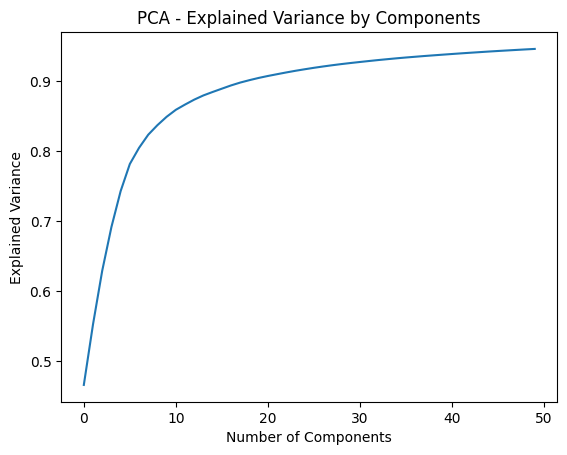

In [190]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.title("PCA - Explained Variance by Components")

plt.show()

### KNN

#### Cross-validate

In [191]:
acc_n = {}
for n in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors=n)
    mean_acc = cross_val_score(knn, X=X_pca_model, y=y, scoring='accuracy', cv=5).mean()
    acc_n[n] = mean_acc

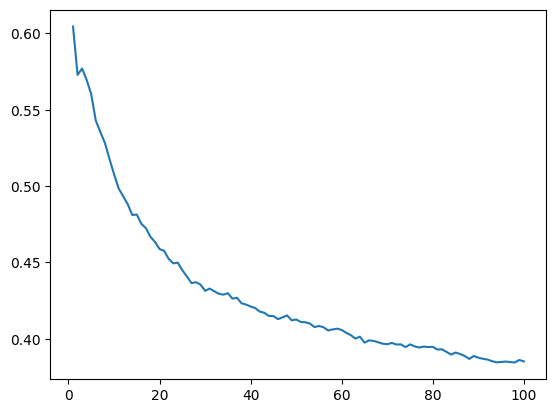

In [192]:
plt.plot(acc_n.keys(), acc_n.values())

#### Hold-out

In [193]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca_model, y, test_size=0.2, random_state=42)

In [194]:
knn = KNeighborsClassifier(n_neighbors=1)  # Teste diferentes valores de K
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [195]:
y_pred = knn.predict(X_test)

#### Metrics

In [196]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculando as métricas corretamente para classificação multiclasse
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # ou 'macro'
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Exibir os resultados
print(f"The model's accuracy is: {accuracy}")
print(f"The model's precision is: {precision}")
print(f"The model's recall is: {recall}")
print(f"The F1 score is: {f1}")

The model's accuracy is: 0.6099567099567099
The model's precision is: 0.5993415139942336
The model's recall is: 0.6099567099567099
The F1 score is: 0.6020543602060462


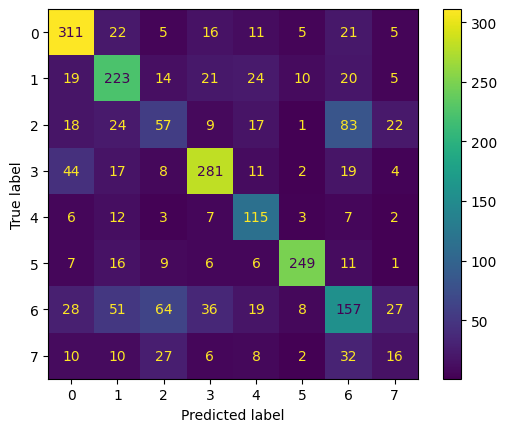

In [197]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

plt.show()

### Random Forest

#### Cross-validate

In [198]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

RFClass = RandomForestClassifier()
mean_acc = cross_val_score(RFClass, X=X_pca_model, y=y, scoring='accuracy', cv=5).mean()
mean_acc

np.float64(0.7007792207792208)

#### Hold-out

In [199]:
RFClass.fit(X_train, y_train)
y_pred = RFClass.predict(X_test)

#### Metrics

In [200]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculando as métricas corretamente para classificação multiclasse
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # ou 'macro'
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Exibir os resultados
print(f"The model's accuracy is: {accuracy}")
print(f"The model's precision is: {precision}")
print(f"The model's recall is: {recall}")
print(f"The F1 score is: {f1}")

The model's accuracy is: 0.7116883116883117
The model's precision is: 0.7237297587177018
The model's recall is: 0.7116883116883117
The F1 score is: 0.6860106504361679


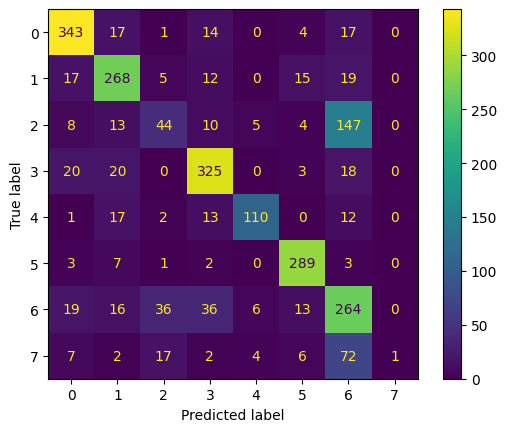

In [201]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

plt.show()